Lista 5

Zadanie 2

In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
def autokowariancja(h, x):
    n = len(x)
    mean_x = np.mean(x)
    return 1/n * np.sum((x[:n-abs(h)] - mean_x) * (x[abs(h):] - mean_x))

In [15]:
def autokorelacja(h, x):
    return autokowariancja(h, x) / autokowariancja(0,x)

In [34]:
n = 1000
sigma_Z = 1
sigma_W = 0.5
theta = 2

In [35]:
def x_sample(n, sigma, theta):
    z = np.random.normal(0, sigma, n+1)
    x = np.zeros(n)
    for i in range(1,n+1):
        x[i-1] = z[i] + theta * z[i-1]
    return x

In [36]:
def y_sample(n, sigma_z, theta, sigma_w):
    x = x_sample(n, sigma_z, theta)
    w = np.random.normal(0, sigma_w, n)
    return x + w

In [37]:
def teo_autokow(h, sigma_z, sigma_w, theta):
    if h == 0:
        return sigma_z**2 * (theta**2 + 1) + sigma_w**2
    elif h == 1 or h == -1:
        return theta * sigma_z**2
    else:
        return 0

In [38]:
def teo_autokor(h, sigma_z, sigma_w, theta):
    if h == 0:
        return 1
    elif h == 1 or h == -1:
        return (sigma_z**2 * theta) / (sigma_z**2 * (1 + theta**2) + sigma_w**2)
    else:
        return 0

In [54]:
hs = np.arange(0,21,1)
autokow_emp, autokow_teo = [], []
autokor_emp, autokor_teo = [], []

In [55]:
y = y_sample(n, sigma_Z, theta, sigma_W)

In [56]:
for h in hs:
    autokow_emp.append(autokowariancja(h, y))
    autokow_teo.append(teo_autokow(h, sigma_Z, sigma_W, theta))
    autokor_emp.append(autokorelacja(h, y))
    autokor_teo.append(teo_autokor(h, sigma_Z, sigma_W, theta))

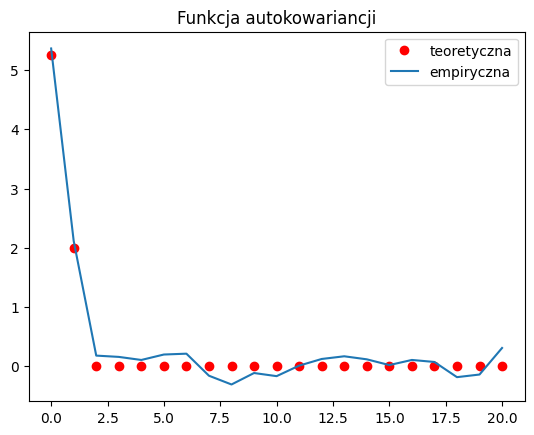

In [57]:
plt.plot(hs, autokow_teo, "ro", label="teoretyczna")
plt.plot(hs, autokow_emp, label="empiryczna")
plt.title("Funkcja autokowariancji")
plt.legend(loc="best")
plt.show()

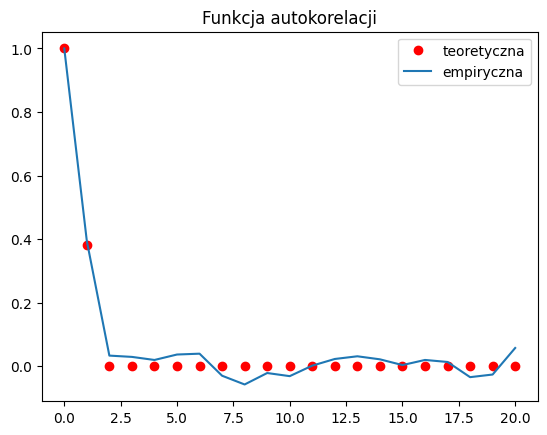

In [58]:
plt.plot(hs, autokor_teo, "ro", label="teoretyczna")
plt.plot(hs, autokor_emp, label="empiryczna")
plt.title("Funkcja autokorelacji")
plt.legend(loc="best")
plt.show()

Zadanie 4